In [2]:
# Load libraries 
import os, gc
import numpy as np
import pandas as pd
from warnings import filterwarnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set library configuration

plt.style.use("ggplot")

filterwarnings("ignore")

pd.set_option("display.max_columns", None)

# 1. Data Understanding

In [4]:
# Read dataset
data = pd.read_csv("dataset/Train_data.csv")

In [5]:
# Gather basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

Column Description:

1. **duration**: The length of time (in seconds) of the connection or activity.

2. **protocol_type**: The type of network protocol used in the connection (e.g., TCP, UDP, ICMP).

3. **service**: The network service on the destination machine (e.g., http, ftp, ssh) that the connection is attempting to access.

4. **flag**: This field denotes the status of the connection or session (e.g., S0, SF, REJ).

5. **src_bytes**: The number of data bytes transferred from the source (client) to the destination (server) during the connection.

6. **dst_bytes**: The number of data bytes transferred from the destination (server) to the source (client) during the connection.

7. **land**: A binary feature indicating if the connection is from/to the same source/destination host (1 if true, 0 if false).

8. **wrong_fragment**: The number of "wrong" fragments received during the connection.

9. **urgent**: The number of urgent packets received.

10. **hot**: The number of "hot" indicators, typically referring to the number of access attempts to sensitive files or system areas.

11. **num_failed_logins**: The number of failed login attempts.

12. **logged_in**: A binary feature indicating if the user is logged in (1 if true, 0 if false).

13. **num_compromised**: The number of compromised conditions detected.

14. **root_shell**: A binary feature indicating if a root shell was obtained (1 if true, 0 if false).

15. **su_attempted**: A binary feature indicating if the "su" command (substitute user) was attempted (1 if true, 0 if false).

16. **num_root**: The number of root accesses.

17. **num_file_creationsz**: The number of file creation operations.

18. **num_shellsz**: The number of shell prompts (command interpreters) used.

19. **num_access_files**: The number of access control files involved in the connection.

20. **num_outbound_cmds**: The number of outbound commands in an ftp session.

21. **is_host_login**: A binary feature indicating if the login belongs to the "host" list (1 if true, 0 if false).

22. **is_guest_login**: A binary feature indicating if the login belongs to the "guest" list (1 if true, 0 if false).

23. **count**: The number of connections to the same destination host as the current connection in the past two seconds.

24. **srv_count**: The number of connections to the same service (port number) as the current connection in the past two seconds.

25. **serror_rate**: The percentage of connections that have "SYN" errors.

26. **srv_serror_rate**: The percentage of connections to the same service (port number) that have "SYN" errors.

27. **rerror_rate**: The percentage of connections that have "REJ" errors.

28. **srv_rerror_rate**: The percentage of connections to the same service (port number) that have "REJ" errors.

29. **same_srv_rate**: The percentage of connections to the same service (port number) among the same destination host.

30. **diff_srv_rate**: The percentage of connections to different services (port numbers) among the same destination host.

31. **srv_diff_host_rate**: The percentage of connections to different destination hosts among the same service (port number).

32. **dst_host_count**: The number of connections to the same destination host in the past two seconds.

33. **dst_host_srv_count**: The number of connections to the same service (port number) on the destination host.

34. **dst_host_same_srv_rate**: The percentage of connections to the same service (port number) among all connections to the destination host.

35. **dst_host_diff_srv_rate**: The percentage of connections to different services (port numbers) among all connections to the destination host.

36. **dst_host_same_src_port_rate**: The percentage of connections to the same source port among all connections to the destination host.

37. **dst_host_srv_diff_host_rate**: The percentage of connections to different destination hosts among all connections to the same service (port number).

38. **dst_host_serror_rate**: The percentage of connections that have "SYN" errors among all connections to the destination host.

39. **dst_host_srv_serror_rate**: The percentage of connections to the same service (port number) that have "SYN" errors among all connections to the destination host.

40. **dst_host_rerror_rate**: The percentage of connections that have "REJ" errors among all connections to the destination host.

41. **dst_host_srv_rerror_rate**: The percentage of connections to the same service (port number) that have "REJ" errors among all connections to the destination host.

42. **class**: The target variable indicating the class or category of the network connection (e.g., normal, anomaly).

# 2. Statistical Analysis

In [6]:
# Statistic description in general
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Label Distribution
pd.DataFrame(data['class'].value_counts())

,class
normal,13449
anomaly,11743


Interpretasi:

    Setiap label memiliki rasio yang hampir seimbang (balance) sehingga tidak perlu dilakukan teknik augmentasi data pada minoritas label.

In [8]:
# Apply encoder on categorical column values
mapping_encoder = {}

for col in data.select_dtypes("O").columns:
    encoder = OrdinalEncoder()
    encoder.fit(data[col].values.reshape(-1, 1))
    data[col] = encoder.transform(data[col].values.reshape(-1, 1))
    mapping_encoder[col] = {key:value for (key, value) in enumerate(encoder.categories_[0])}

In [23]:
# Overview dataset
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1.0,19.0,9.0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1.0
1,0,2.0,41.0,9.0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1.0
2,0,1.0,46.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0
3,0,1.0,22.0,9.0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.0
4,0,1.0,22.0,9.0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0


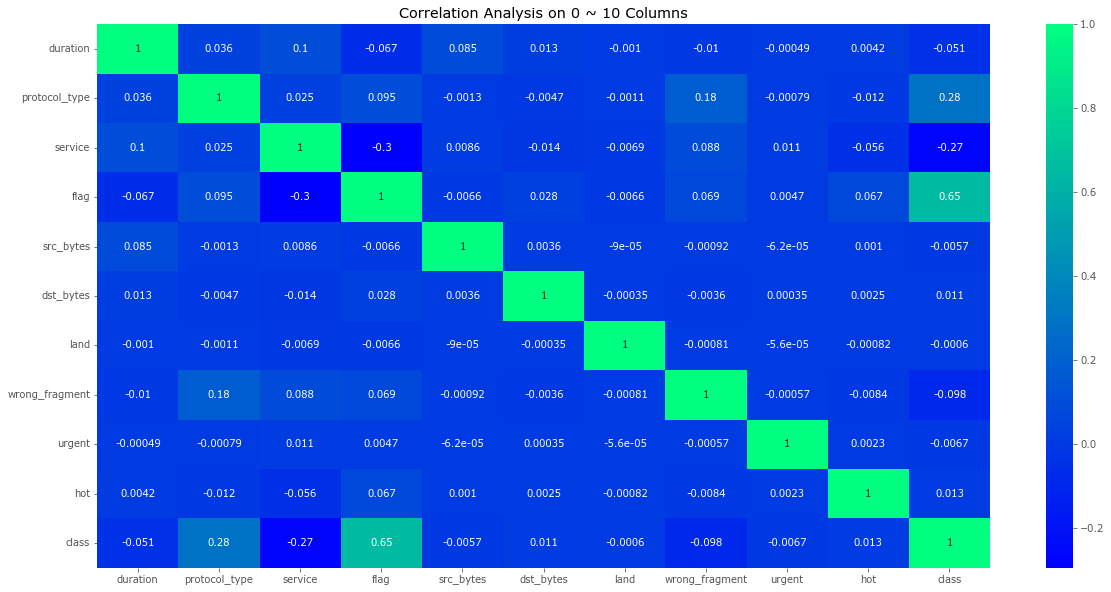

In [9]:
# Correlation Analysis
plt.figure(figsize = (20, 10))
plt.title("Correlation Analysis on 0 ~ 10 Columns")
sns.heatmap(data[data.columns[:10].tolist() + ["class"]].corr(), annot = True, cmap = "winter")
plt.show()

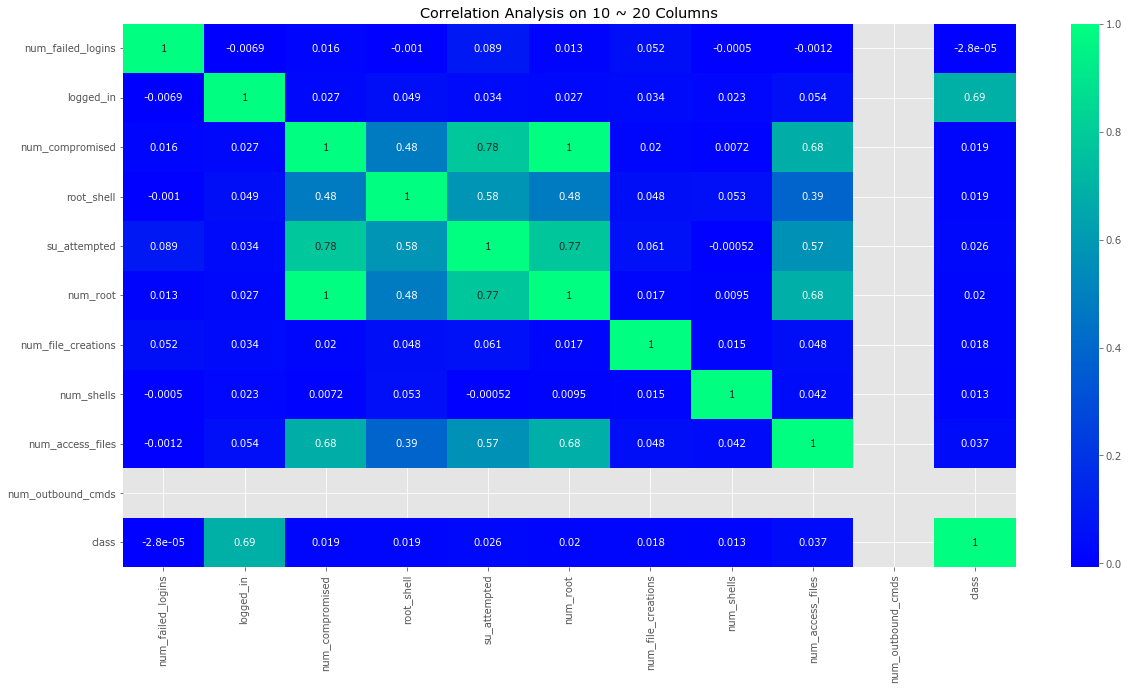

In [10]:
# Correlation Analysis
plt.figure(figsize = (20, 10))
plt.title("Correlation Analysis on 10 ~ 20 Columns")
sns.heatmap(data[data.columns[10:20].tolist() + ["class"]].corr(), annot = True, cmap = "winter")
plt.show()

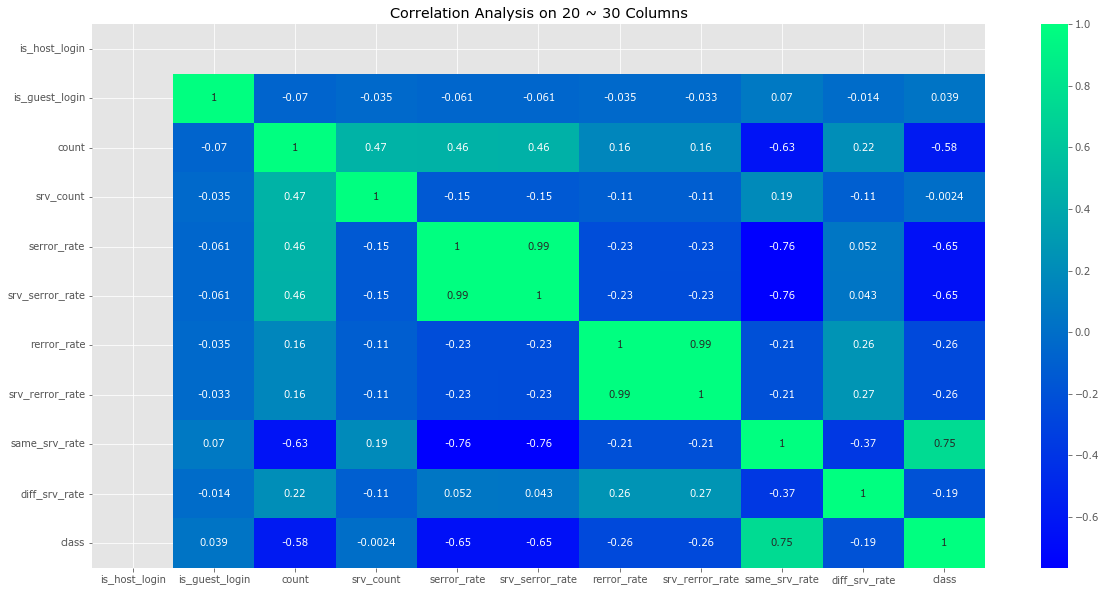

In [11]:
# Correlation Analysis
plt.figure(figsize = (20, 10))
plt.title("Correlation Analysis on 20 ~ 30 Columns")
sns.heatmap(data[data.columns[20:30].tolist() + ["class"]].corr(), annot = True, cmap = "winter")
plt.show()

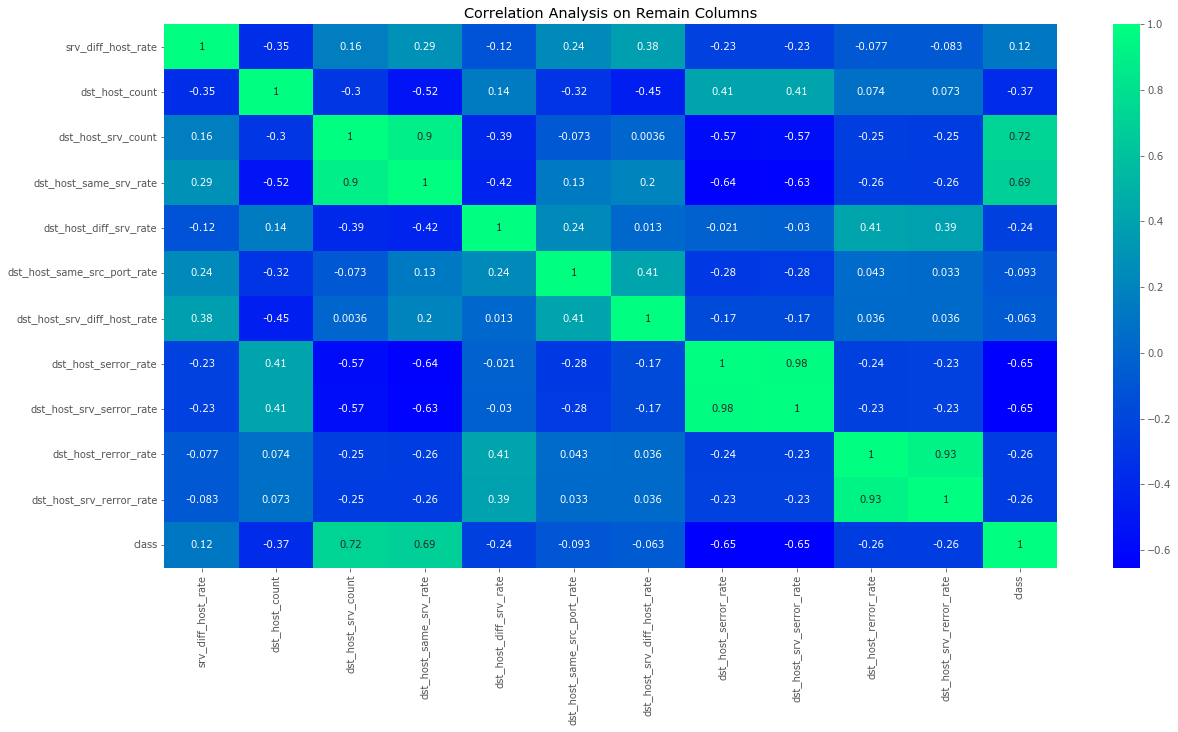

In [13]:
# Correlation Analysis
plt.figure(figsize = (20, 10))
plt.title("Correlation Analysis on Remain Columns")
sns.heatmap(data[data.columns[30:].tolist()].corr(), annot = True, cmap = "winter")
plt.show()

Interpretasi:

    Acuan utama dalam meninjau korelasi antar variabel bisa ditinjau dari perbandingan variabel X dengan variabel "class", dengan mengutamakan distribusi yang memiliki warna hijau (atau mendekati), kami mempertimbangkan bahwa variabel yang memiliki korelasi positif (x > 0) memiliki distribusi pada interval (0 ~ 1), serta banyaknya variabel yang memiliki nilai berupa binary maupun di dominasi oleh nilai 0, mengakibatkan rendahnya korelasi variabel yang tidak berkaitan secara konteks.

## 2.1. Hypothesis Testing

In [25]:
# Load libraries
from scipy.stats import f_oneway

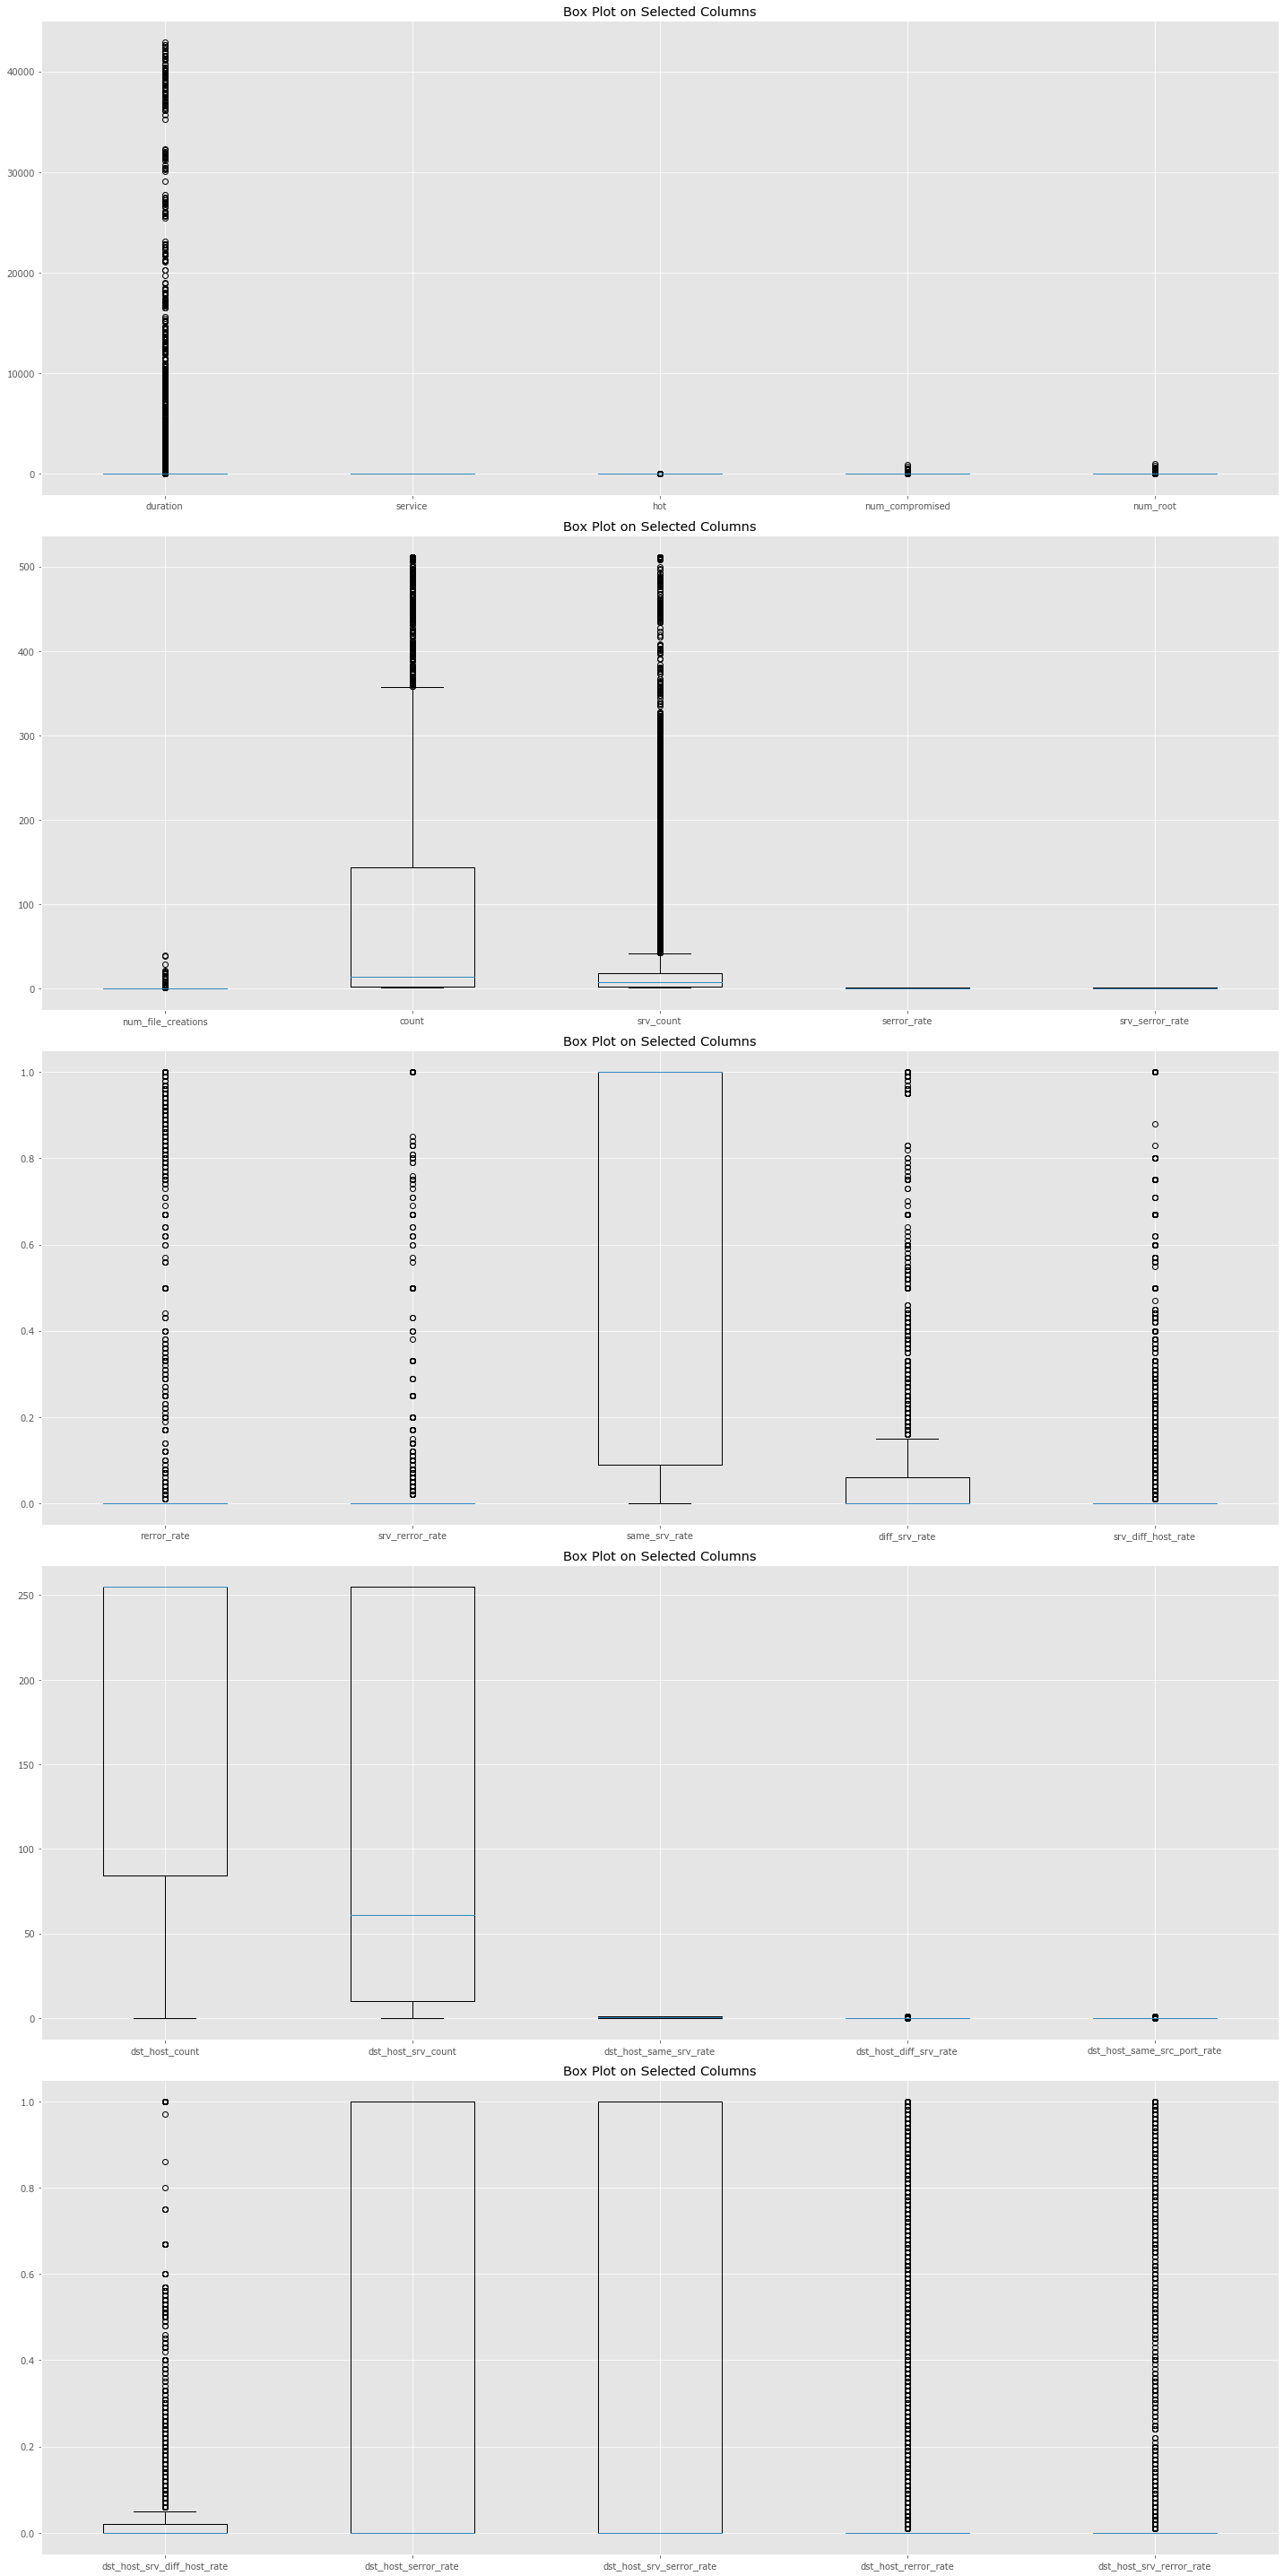

In [41]:
# Overview Feature Distribution and Outlier Distribution
select_column = [col for col in data.columns if 15 < len(data[col].value_counts()) < 1000]

fig, ax = plt.subplots(5, 1, figsize = (20, 40))
prev_index = 0
for idx, i in enumerate(range(5, len(select_column) + 5, 5)):
    ax[idx].boxplot(data[select_column[prev_index:i]])
    ax[idx].set_xticklabels(select_column[prev_index:i])
    ax[idx].set_title(f"Box Plot on Selected Columns")
    prev_index = i
    
fig.tight_layout()
plt.show()

Interpretasi:

      Pada kasus anomali / outlier dalam dataset "gangguan jaringan", tidak bisa sekedar melakukan removal / imputasi, ada baiknya kasus outlier ini di diskusikan lebih lanjut dengan para SME, untuk pengambilan keputusan bagaimana cara menangani outlier pada setiap kolom tersebut, sehingga pada project kali ini, kami memilih untuk membiarkan outlier tersebut sebagai bias variance dalam pembuatan model machine learning jenis klasifikasi binary (1 / 0).

In [43]:
# Perform ANOVA
def perform_anova(data, alpha = 0.05):
    """
    Perform ANOVA test on the 'count' column with respect to the 'class' column.

    Parameters:
        data (pandas.DataFrame): A DataFrame containing 'count' and 'class' columns.
        alpha (float): The significance level (default is 0.05).

    Returns:
        str: Conclusion of the ANOVA test based on the p-value.
        float: F-statistic of the ANOVA test.
        float: p-value of the ANOVA test.
    """
    groups = []
    for group_name, group_data in data.groupby('class')['count']:
        groups.append(group_data)

    f_statistic, p_value = f_oneway(*groups)

    if p_value < alpha:
        conclusion = "Reject H0: There is a significant difference in mean 'count' among different classes."
    else:
        conclusion = "Fail to reject H0: There is no significant difference in mean 'count' among different classes."

    return conclusion, f_statistic, p_value

In [45]:
# Apply ANOVA (F-One Way)
alpha = 0.05
conclusion, f_statistic, p_value = perform_anova(data[['count', 'class']], alpha)

print("F-statistic:", f_statistic)
print("p-value:", p_value)
print(conclusion)

F-statistic: 12689.565758834266
p-value: 0.0
Reject H0: There is a significant difference in mean 'count' among different classes.


# 3. Data Modeling

In [89]:
# Load libraries 
from typing import List
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
# Define feature and target of dataset - initial phase
feature = data.drop("class", axis = 1)
target  = data["class"]

In [94]:
# Create train & validation set of data with ratio 80:20
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(
    feature, target, test_size = 0.2, 
    stratify =  target, random_state = 1
)

# Transform Series or DataFrame into np.ndarray
X_train, X_val, y_train, y_val = X_train_df.values, X_val_df.values, y_train_df.values, y_val_df.values

# Check dimension
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20153, 41), (5039, 41), (20153,), (5039,))

In [121]:
# Define explanaible visualisation of each machine learning model
def plot_logistic_regression_explanation(model: object, X_train = X_train):
    """
    Plot the explanations for the Logistic Regression model.

    Parameters:
        model: A trained Logistic Regression model from scikit-learn.
        X_train (numpy.ndarray or pandas.DataFrame): Training features.
    """
    features = [0, 1]  # Assuming binary classification, target class 0
    names = data.drop("class", axis = 1).columns.tolist()
    fig, ax = partial_dependence(model, X_train, features=features)
    plt.suptitle("Logistic Regression - Partial Dependence Plot")
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_random_forest_feature_importance(model: object, feature_names: List[str]):
    """
    Plot the feature importance for the Random Forest model.

    Parameters:
        model: A trained Random Forest model from scikit-learn.
        feature_names (list): List of feature names corresponding to the model's features.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 30))
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices], ha='right')
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.title('Random Forest - Feature Importance')
    plt.tight_layout()
    plt.show()

In [96]:
# Create function to training *args of machine learning model
def train_and_predict(model: object, X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val):
    """
    Train and predict using the specified model on the training and validation sets.

    Parameters:
        model: A scikit-learn model object.
        X_train (numpy.ndarray or pandas.DataFrame): Training features.
        y_train (numpy.ndarray or pandas.Series): Training labels.
        X_val (numpy.ndarray or pandas.DataFrame): Validation features.
        y_val (numpy.ndarray or pandas.Series): Validation labels.

    Returns:
        object: Trained model scikit-learn on the training set.
        numpy.ndarray: Predicted labels on the validation set.
        float: Accuracy score on the validation set.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return model, y_pred, accuracy

In [97]:
# Create function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix', figsize=(10, 10), cmap = 'Blues'):
    """
    Plot the confusion matrix using a seaborn heatmap.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        labels (list): List of class labels to be displayed on the axis.
        title (str): Title of the plot (default is 'Confusion Matrix').
        figsize (tuple): Size of the plot (default is (7, 5)).
        cmap (str): Colormap to be used for the heatmap (default is 'Blues').
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=figsize)
    sns.set(font_scale = 1.5)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, square=True, xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

## 3.1. Logistic Regression

In [98]:
# Define baseline model
model_logreg = LogisticRegression()

In [99]:
# Training & Evaluation
model_logreg, y_pred, acc_logreg = train_and_predict(model_logreg)

In [101]:
# Metrics Evaluation
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      2349
         1.0       0.87      0.88      0.88      2690

    accuracy                           0.87      5039
   macro avg       0.87      0.87      0.87      5039
weighted avg       0.87      0.87      0.87      5039



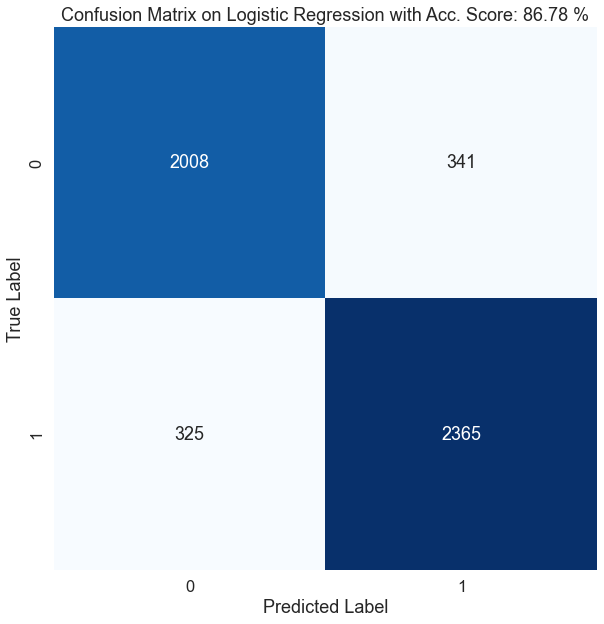

In [102]:
# Confusion Matrix
plot_confusion_matrix(
    y_val, y_pred, labels = [0, 1], 
    title = f"Confusion Matrix on Logistic Regression with Acc. Score: {np.round(acc_logreg, 4) * 100} %"
)

## 3.2. Random Forest

In [113]:
# Define baseline model
model_rf = RandomForestClassifier()

In [114]:
# Training & Evaluation
model_rf, y_pred, acc_logreg = train_and_predict(model_rf)

In [115]:
# Metrics Evaluation
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2349
         1.0       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



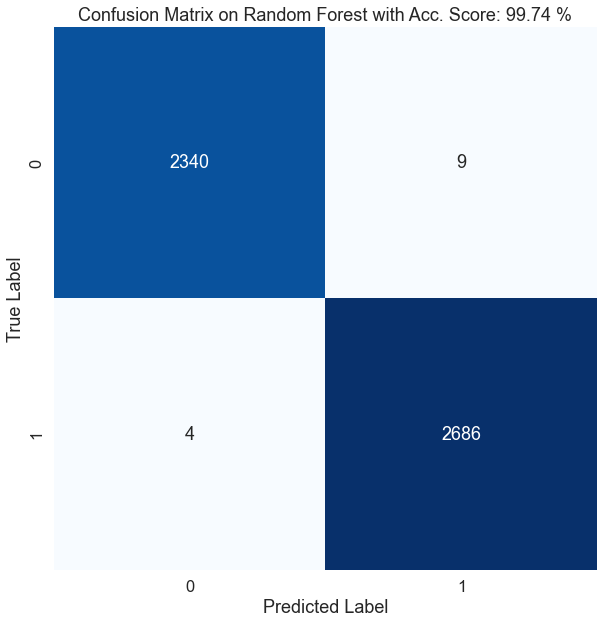

In [116]:
# Confusion Matrix
plot_confusion_matrix(
    y_val, y_pred, labels = [0, 1], 
    title = f"Confusion Matrix on Random Forest with Acc. Score: {np.round(acc_logreg, 4) * 100} %"
)

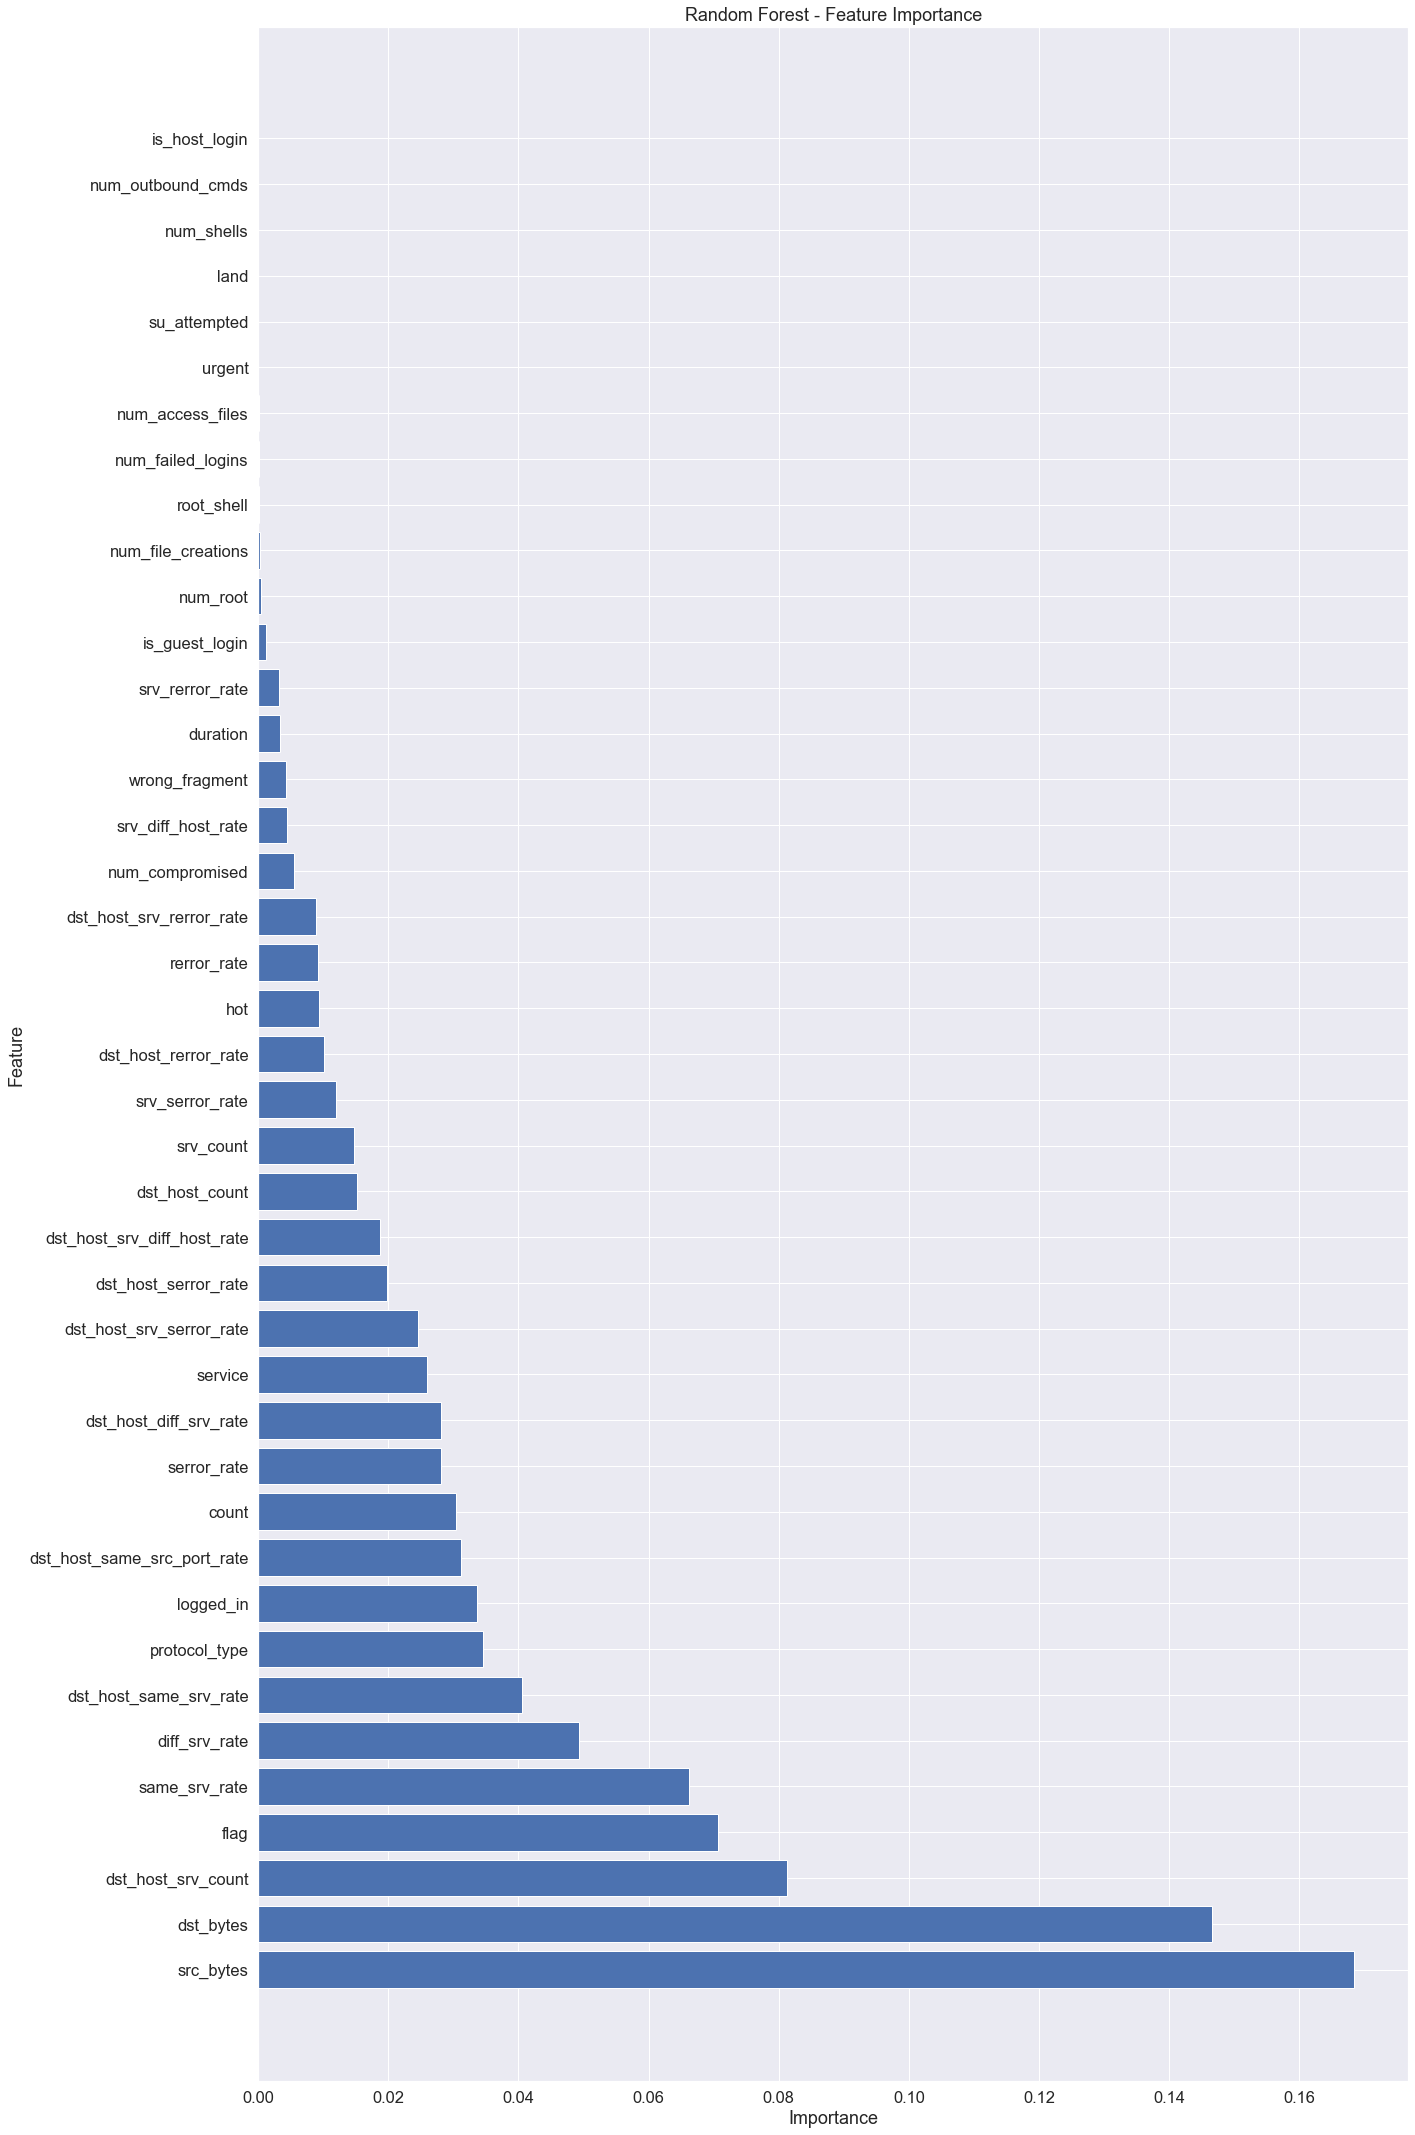

In [122]:
# Visualize feature "used" in random forest model
plot_random_forest_feature_importance(model_rf, X_train_df.columns)

Interpretasi:

    Berdasarkan kasus pendeteksian di domain cyber security salah satu model yang paling sering digunakan adalah Random Forest[1], dikarenakan fitur-fitur dalam dataset sangat bervariasi, hal tersebut selaras dengan hipotesis dari pengembangan model random forest yaitu "semakin banyak feature, random forest akan semakin baik hasilnya", dengan menjadikan bias ataupun outliers membuat algoritma random forest menjadi lebih detail untuk pembagian node left & right nya.
    
    Pada hasil percobaan kami, mendapatkan algoritma random forest memiliki akurasi sebesar 99.74% dibandingkan algoritma logistik regression sebesar 86.78% (12.96% improvement accuracy), menjadikan algoritma random forest adalah model yang kami pilih untuk dilanjutkan pada tahap inference selanjutnya dalam fase pertama (tanpa preprocessing dan outlier handling lebih lanjut).

Kesimpulan:

    Dengan akurasi sebesar 99.74%, model machine learning meningkatkan efisiensi dan keandalan deteksi intrusi jaringan. Hal ini memungkinkan tim keamanan untuk merespons dengan cepat dan mencegah kerusakan serius, sambil menghemat biaya operasional karena kesalahan identifikasi yang rendah. Selain itu, model ini meningkatkan keamanan jaringan secara keseluruhan dan memungkinkan fokus pada tugas-tugas penting lainnya.

# Reference

[1] Sharma, A. and Sahay, S.K. (2016). An Effective Approach for Classification of Advanced Malware with High Accuracy. International Journal of Security and Its Applications, 10(4), pp.249–266. doi:https://doi.org/10.14257/ijsia.2016.10.4.24.